In [1]:
!pip install mlxtend

In [2]:
import pandas as pd
from mlxtend.frequent_patterns import apriori,association_rules
from mlxtend.preprocessing import TransactionEncoder
import matplotlib.pyplot as plt
import seaborn as sns
from mlxtend.frequent_patterns import apriori,association_rules

In [3]:
grocery = pd.read_csv("C:/Users/navee/OneDrive/Desktop/Data Science Assignments/Assignment 9 - Association Rules/groceries.csv",sep=';',names=['items'])
grocery

,items
0,"citrus fruit,semi-finished bread,margarine,rea..."
1,"tropical fruit,yogurt,coffee"
2,whole milk
3,"pip fruit,yogurt,cream cheese ,meat spreads"
4,"other vegetables,whole milk,condensed milk,lon..."
...,...
9830,"sausage,chicken,beef,hamburger meat,citrus fru..."
9831,cooking chocolate
9832,"chicken,citrus fruit,other vegetables,butter,y..."
9833,"semi-finished bread,bottled water,soda,bottled..."


In [4]:
# creating col for all items
data = list(grocery["items"].apply(lambda x:x.split(',')))

te = TransactionEncoder()
te_data = te.fit(data).transform(data)
groc = pd.DataFrame(te_data,columns=te.columns_).astype(int)

groc

,Instant food products,UHT-milk,abrasive cleaner,artif. sweetener,baby cosmetics,baby food,bags,baking powder,bathroom cleaner,beef,...,turkey,vinegar,waffles,whipped/sour cream,whisky,white bread,white wine,whole milk,yogurt,zwieback
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9830,0,0,0,0,0,0,0,0,0,1,...,0,0,0,1,0,0,0,1,0,0
9831,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9832,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
9833,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
groc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9835 entries, 0 to 9834
Columns: 169 entries, Instant food products to zwieback
dtypes: int32(169)
memory usage: 6.3 MB


# Apriori Algorithm with 10 % minimum support

In [6]:
frequent_groc1 = apriori(groc, min_support=0.05,max_len=3,use_colnames = True)
frequent_groc1

,support,itemsets
0,0.052466,(beef)
1,0.080529,(bottled beer)
2,0.110524,(bottled water)
3,0.064870,(brown bread)
4,0.055414,(butter)
5,0.077682,(canned beer)
6,0.082766,(citrus fruit)
7,0.058058,(coffee)
8,0.053279,(curd)
9,0.063447,(domestic eggs)


In [7]:
# using Lift as metric and keeping the value as maximum 1
rules1a = association_rules(frequent_groc1, metric="lift", min_threshold=1)
rules1a.sort_values('lift',ascending = False).head(10)  

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
4,(yogurt),(whole milk),0.139502,0.255516,0.056024,0.401603,1.571735,0.020379,1.244132
5,(whole milk),(yogurt),0.255516,0.139502,0.056024,0.219260,1.571735,0.020379,1.102157
0,(other vegetables),(whole milk),0.193493,0.255516,0.074835,0.386758,1.513634,0.025394,1.214013
1,(whole milk),(other vegetables),0.255516,0.193493,0.074835,0.292877,1.513634,0.025394,1.140548
2,(whole milk),(rolls/buns),0.255516,0.183935,0.056634,0.221647,1.205032,0.009636,1.048452
3,(rolls/buns),(whole milk),0.183935,0.255516,0.056634,0.307905,1.205032,0.009636,1.075696


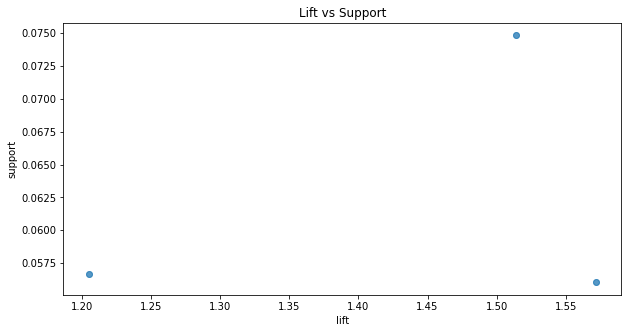

In [8]:
plt.figure(figsize=(10,5))
plt.scatter(rules1a['lift'], rules1a['support'], alpha=0.5)
plt.xlabel('lift')
plt.ylabel('support')
plt.title('Lift vs Support')
plt.show()

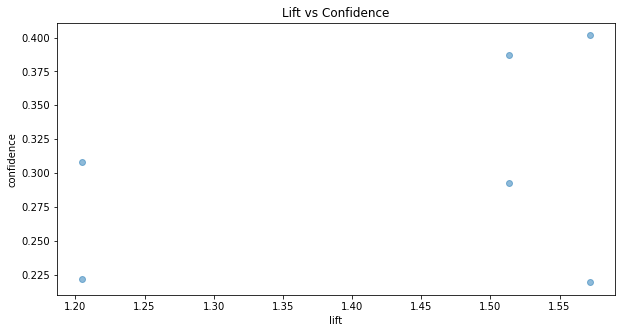

In [9]:
plt.figure(figsize=(10,5))
plt.scatter(rules1a['lift'], rules1a['confidence'], alpha=0.5)
plt.xlabel('lift')
plt.ylabel('confidence')
plt.title('Lift vs Confidence')
plt.show()

In [10]:
# using confidence as metric and keeping the value as 0.1
rules1b = association_rules(frequent_groc1, metric="confidence", min_threshold=0.1)
rules1b.sort_values('lift',ascending = False).head(10)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
4,(yogurt),(whole milk),0.139502,0.255516,0.056024,0.401603,1.571735,0.020379,1.244132
5,(whole milk),(yogurt),0.255516,0.139502,0.056024,0.219260,1.571735,0.020379,1.102157
0,(other vegetables),(whole milk),0.193493,0.255516,0.074835,0.386758,1.513634,0.025394,1.214013
1,(whole milk),(other vegetables),0.255516,0.193493,0.074835,0.292877,1.513634,0.025394,1.140548
2,(whole milk),(rolls/buns),0.255516,0.183935,0.056634,0.221647,1.205032,0.009636,1.048452
3,(rolls/buns),(whole milk),0.183935,0.255516,0.056634,0.307905,1.205032,0.009636,1.075696


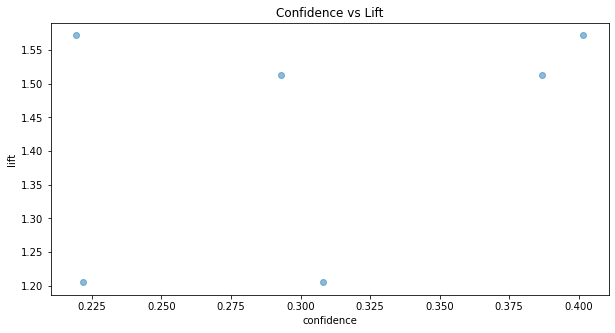

In [11]:
plt.figure(figsize=(10,5))
plt.scatter(rules1b['confidence'], rules1b['lift'], alpha=0.5)
plt.xlabel('confidence')
plt.ylabel('lift')
plt.title('Confidence vs Lift')
plt.show()

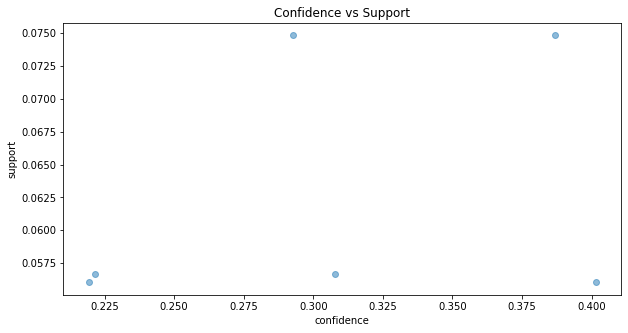

In [12]:
plt.figure(figsize=(10,5))
plt.scatter(rules1b['confidence'], rules1b['support'], alpha=0.5)
plt.xlabel('confidence')
plt.ylabel('support')
plt.title('Confidence vs Support')
plt.show()

In [13]:
# using support as metric and keeping the value as 0.05
rules1c = association_rules(frequent_groc1, metric="support", min_threshold=.05)
rules1c.sort_values('lift',ascending = False).head(10)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
4,(yogurt),(whole milk),0.139502,0.255516,0.056024,0.401603,1.571735,0.020379,1.244132
5,(whole milk),(yogurt),0.255516,0.139502,0.056024,0.219260,1.571735,0.020379,1.102157
0,(other vegetables),(whole milk),0.193493,0.255516,0.074835,0.386758,1.513634,0.025394,1.214013
1,(whole milk),(other vegetables),0.255516,0.193493,0.074835,0.292877,1.513634,0.025394,1.140548
2,(whole milk),(rolls/buns),0.255516,0.183935,0.056634,0.221647,1.205032,0.009636,1.048452
3,(rolls/buns),(whole milk),0.183935,0.255516,0.056634,0.307905,1.205032,0.009636,1.075696


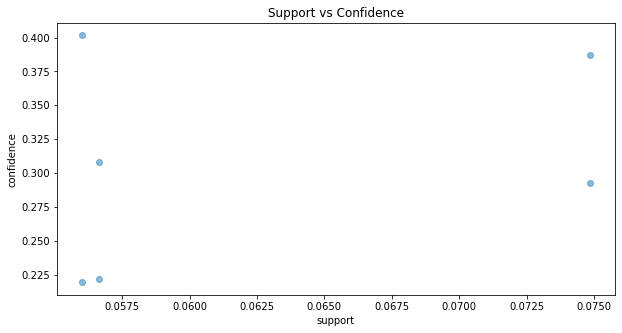

In [14]:
plt.figure(figsize=(10,5))
plt.scatter(rules1c['support'], rules1c['confidence'], alpha=0.5)
plt.xlabel('support')
plt.ylabel('confidence')
plt.title('Support vs Confidence')
plt.show()

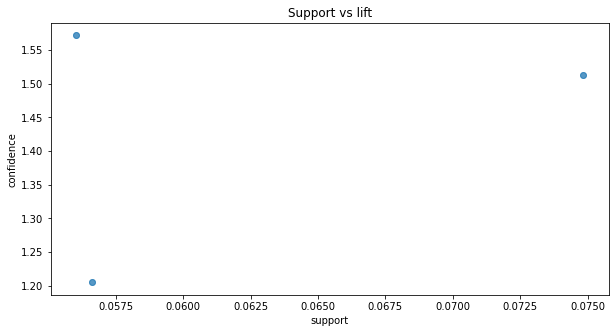

In [15]:
plt.figure(figsize=(10,5))
plt.scatter(rules1c['support'], rules1c['lift'], alpha=0.5)
plt.xlabel('support')
plt.ylabel('confidence')
plt.title('Support vs lift')
plt.show()

# Apriori Algorithm with 2 % minimum support

In [16]:
frequent_groc2 = apriori(groc, min_support=0.02, use_colnames=True)
frequent_groc2

,support,itemsets
0,0.033452,(UHT-milk)
1,0.052466,(beef)
2,0.033249,(berries)
3,0.026029,(beverages)
4,0.080529,(bottled beer)
...,...,...
117,0.032232,"(whipped/sour cream, whole milk)"
118,0.020742,"(whipped/sour cream, yogurt)"
119,0.056024,"(yogurt, whole milk)"
120,0.023183,"(other vegetables, root vegetables, whole milk)"


In [17]:
# using Lift as metric and keeping the value as 0.5
rules2a = association_rules(frequent_groc2, metric="lift", min_threshold=0.5)
rules2a.sort_values('lift',ascending = False).head(10)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
123,"(other vegetables, whole milk)",(root vegetables),0.074835,0.108998,0.023183,0.309783,2.842082,0.015026,1.290900
126,(root vegetables),"(other vegetables, whole milk)",0.108998,0.074835,0.023183,0.212687,2.842082,0.015026,1.175091
75,(tropical fruit),(pip fruit),0.104931,0.075648,0.020437,0.194767,2.574648,0.012499,1.147931
74,(pip fruit),(tropical fruit),0.075648,0.104931,0.020437,0.270161,2.574648,0.012499,1.226392
124,"(root vegetables, whole milk)",(other vegetables),0.048907,0.193493,0.023183,0.474012,2.449770,0.013719,1.533320
125,(other vegetables),"(root vegetables, whole milk)",0.193493,0.048907,0.023183,0.119811,2.449770,0.013719,1.080555
52,(other vegetables),(root vegetables),0.193493,0.108998,0.047382,0.244877,2.246605,0.026291,1.179941
53,(root vegetables),(other vegetables),0.108998,0.193493,0.047382,0.434701,2.246605,0.026291,1.426693
129,"(other vegetables, whole milk)",(yogurt),0.074835,0.139502,0.022267,0.297554,2.132979,0.011828,1.225003
132,(yogurt),"(other vegetables, whole milk)",0.139502,0.074835,0.022267,0.159621,2.132979,0.011828,1.100890


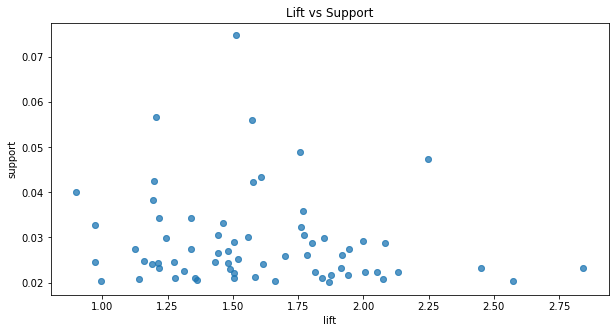

In [18]:
plt.figure(figsize=(10,5))
plt.scatter(rules2a['lift'], rules2a['support'], alpha=0.5)
plt.xlabel('lift')
plt.ylabel('support')
plt.title('Lift vs Support')
plt.show()

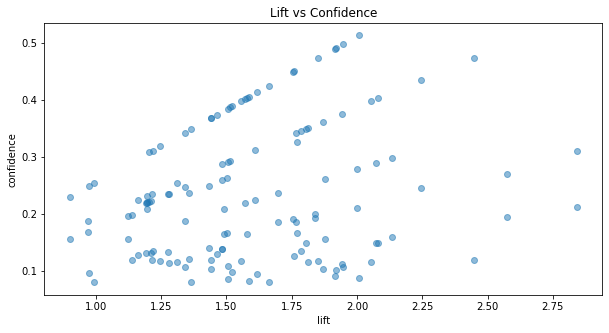

In [19]:
plt.figure(figsize=(10,5))
plt.scatter(rules2a['lift'], rules2a['confidence'], alpha=0.5)
plt.xlabel('lift')
plt.ylabel('confidence')
plt.title('Lift vs Confidence')
plt.show()

In [20]:
# using confidence as metric and keeping the value as 0.4
rules2b = association_rules(frequent_groc2, metric="confidence", min_threshold=.4)
rules2b.sort_values('lift',ascending = False).head(10)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
13,"(root vegetables, whole milk)",(other vegetables),0.048907,0.193493,0.023183,0.474012,2.449770,0.013719,1.533320
6,(root vegetables),(other vegetables),0.108998,0.193493,0.047382,0.434701,2.246605,0.026291,1.426693
7,(whipped/sour cream),(other vegetables),0.071683,0.193493,0.028876,0.402837,2.081924,0.015006,1.350565
14,"(yogurt, other vegetables)",(whole milk),0.043416,0.255516,0.022267,0.512881,2.007235,0.011174,1.528340
1,(butter),(whole milk),0.055414,0.255516,0.027555,0.497248,1.946053,0.013395,1.480817
2,(curd),(whole milk),0.053279,0.255516,0.026131,0.490458,1.919481,0.012517,1.461085
12,"(root vegetables, other vegetables)",(whole milk),0.047382,0.255516,0.023183,0.489270,1.914833,0.011076,1.457687
3,(domestic eggs),(whole milk),0.063447,0.255516,0.029995,0.472756,1.850203,0.013783,1.412030
10,(whipped/sour cream),(whole milk),0.071683,0.255516,0.032232,0.449645,1.759754,0.013916,1.352735
8,(root vegetables),(whole milk),0.108998,0.255516,0.048907,0.448694,1.756031,0.021056,1.350401


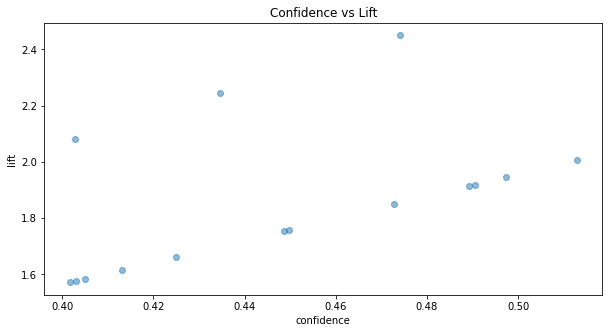

In [21]:
plt.figure(figsize=(10,5))
plt.scatter(rules2b['confidence'], rules2b['lift'], alpha=0.5)
plt.xlabel('confidence')
plt.ylabel('lift')
plt.title('Confidence vs Lift')
plt.show()

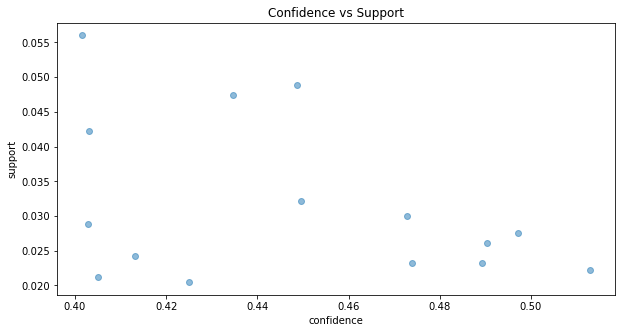

In [22]:
plt.figure(figsize=(10,5))
plt.scatter(rules2b['confidence'], rules2b['support'], alpha=0.5)
plt.xlabel('confidence')
plt.ylabel('support')
plt.title('Confidence vs Support')
plt.show()

In [23]:
# using support as metric and keeping the value as .03
rules2c = association_rules(frequent_groc2, metric="support", min_threshold=.03)
rules2c.sort_values('lift',ascending = False).head(10)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
6,(other vegetables),(root vegetables),0.193493,0.108998,0.047382,0.244877,2.246605,0.026291,1.179941
7,(root vegetables),(other vegetables),0.108998,0.193493,0.047382,0.434701,2.246605,0.026291,1.426693
20,(sausage),(rolls/buns),0.093950,0.183935,0.030605,0.325758,1.771048,0.013324,1.210344
21,(rolls/buns),(sausage),0.183935,0.093950,0.030605,0.166390,1.771048,0.013324,1.086899
10,(tropical fruit),(other vegetables),0.104931,0.193493,0.035892,0.342054,1.767790,0.015589,1.225796
11,(other vegetables),(tropical fruit),0.193493,0.104931,0.035892,0.185497,1.767790,0.015589,1.098913
34,(whipped/sour cream),(whole milk),0.071683,0.255516,0.032232,0.449645,1.759754,0.013916,1.352735
35,(whole milk),(whipped/sour cream),0.255516,0.071683,0.032232,0.126144,1.759754,0.013916,1.062323
29,(whole milk),(root vegetables),0.255516,0.108998,0.048907,0.191405,1.756031,0.021056,1.101913
28,(root vegetables),(whole milk),0.108998,0.255516,0.048907,0.448694,1.756031,0.021056,1.350401


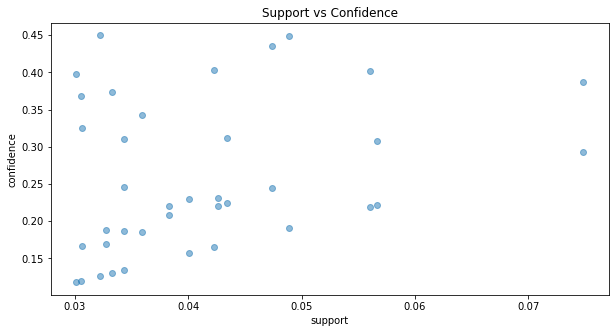

In [24]:
plt.figure(figsize=(10,5))
plt.scatter(rules2c['support'], rules2c['confidence'], alpha=0.5)
plt.xlabel('support')
plt.ylabel('confidence')
plt.title('Support vs Confidence')
plt.show()

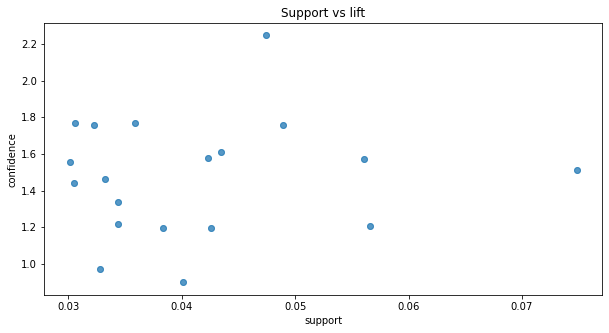

In [25]:
plt.figure(figsize=(10,5))
plt.scatter(rules2c['support'], rules2c['lift'], alpha=0.5)
plt.xlabel('support')
plt.ylabel('confidence')
plt.title('Support vs lift')
plt.show()